In [7]:
import polars as pl
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import prophet

# month order
month_order = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

data = pl.read_csv("data.csv", ignore_errors=True)
print(data)

# get all that have months in the "cohorte" column
data_month = data.filter(pl.col("cohorte").str.contains(r"\b(?:Enero|Febrero|Marzo|Abril|Mayo|Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|Diciembre)\b"))

# add time column
data_month = data_month.with_columns(
    date = pl.date(pl.col("año"), pl.col("cohorte").replace(month_order, range(1, 13)), 28)
)

# get list of reports by month
print(data_month["reporte_descripcion"].unique())
print(data_month.columns)
print(data_month)

shape: (3_268_350, 13)
┌─────────────┬─────────────┬────────────┬────────────┬───┬────────────┬────────────┬──────┬───────┐
│ reporte_des ┆ reporte_cat ┆ reporte_ex ┆ comuna_nom ┆ … ┆ establecim ┆ cohorte    ┆ año  ┆ valor │
│ cripcion    ┆ egoria      ┆ tra        ┆ bre        ┆   ┆ iento_geom ┆ ---        ┆ ---  ┆ ---   │
│ ---         ┆ ---         ┆ ---        ┆ ---        ┆   ┆ etria      ┆ str        ┆ i64  ┆ i64   │
│ str         ┆ str         ┆ str        ┆ str        ┆   ┆ ---        ┆            ┆      ┆       │
│             ┆             ┆            ┆            ┆   ┆ str        ┆            ┆      ┆       │
╞═════════════╪═════════════╪════════════╪════════════╪═══╪════════════╪════════════╪══════╪═══════╡
│ Número de   ┆ En este     ┆ null       ┆ CHILLAN    ┆ … ┆ b'\x01\x01 ┆ Julio      ┆ 2022 ┆ 1     │
│ Consultas   ┆ apartado se ┆            ┆            ┆   ┆ \x00\x00\x ┆            ┆      ┆       │
│ Médicas po… ┆ identifica… ┆            ┆            ┆   ┆ 00\xe5\x

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing


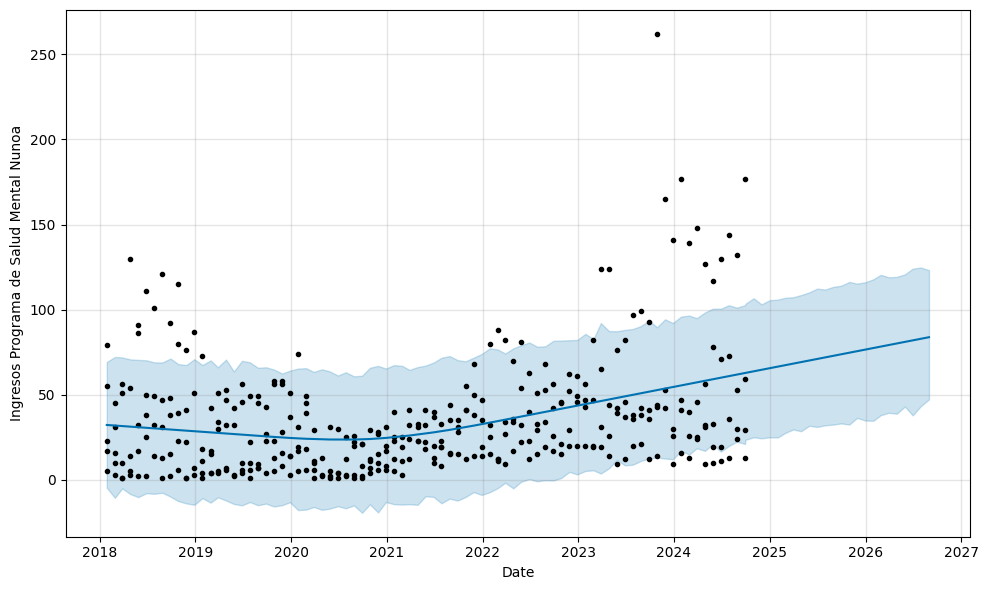

In [8]:
# Ingresos Programa de Salud Mental
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Ingresos Programa de Salud Mental"),
    pl.col("comuna_nombre").str.contains("NUNOA")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot = m.plot(forecast, xlabel="Date", ylabel="Ingresos Programa de Salud Mental Nunoa")

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing


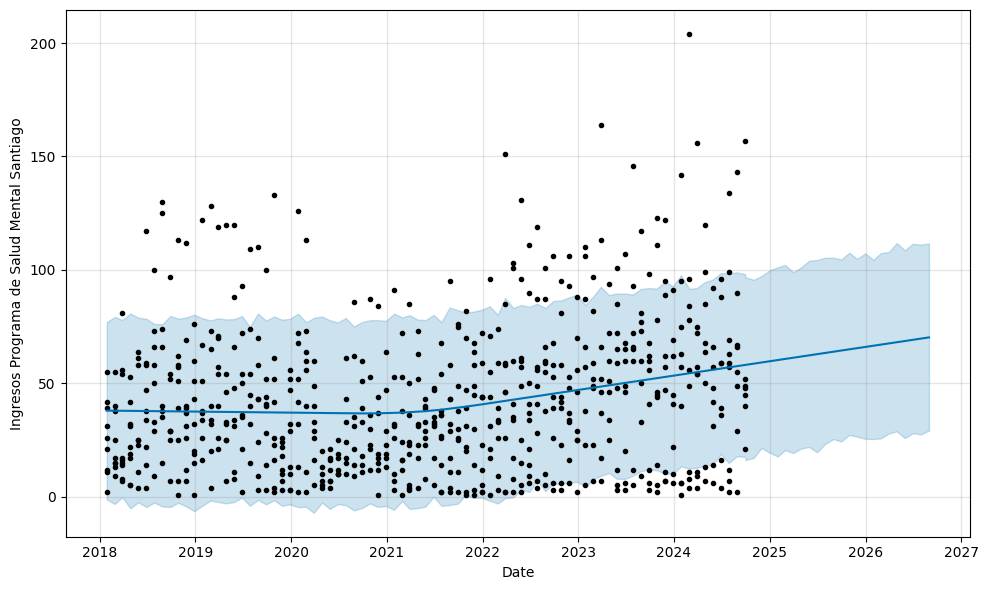

In [9]:
# Ingresos Programa de Salud Mental
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Ingresos Programa de Salud Mental"),
    pl.col("comuna_nombre").str.contains("SANTIAGO")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot = m.plot(forecast, xlabel="Date", ylabel="Ingresos Programa de Salud Mental Santiago")

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing


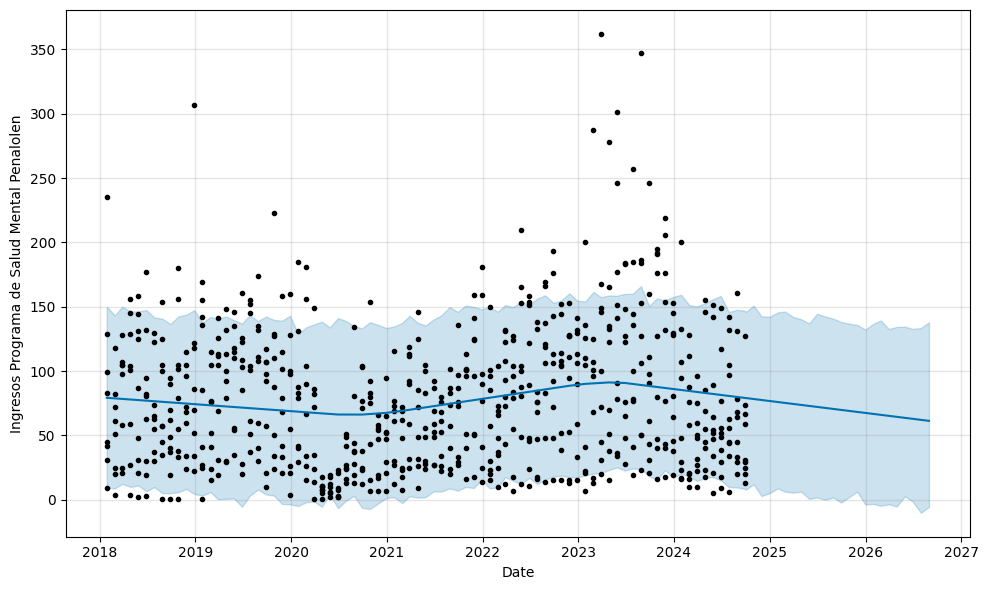

In [10]:
# Ingresos Programa de Salud Mental
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Ingresos Programa de Salud Mental"),
    pl.col("comuna_nombre").str.contains("PENALOLEN")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot = m.plot(forecast, xlabel="Date", ylabel="Ingresos Programa de Salud Mental Penalolen")

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing


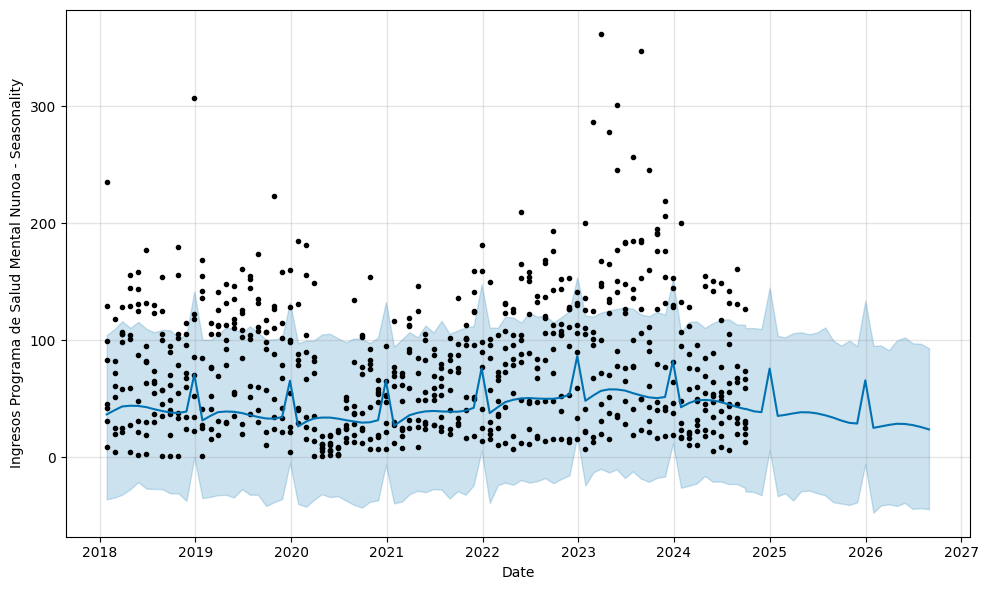

In [11]:
# Ingresos Programa de Salud Mental
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Ingresos Programa de Salud Mental"),
    pl.col("comuna_nombre").str.contains("PENALOLEN")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet()
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot = m.plot(forecast, xlabel="Date", ylabel="Ingresos Programa de Salud Mental Nunoa - Seasonality")

22:36:56 - cmdstanpy - INFO - Chain [1] start processing
22:37:00 - cmdstanpy - INFO - Chain [1] done processing


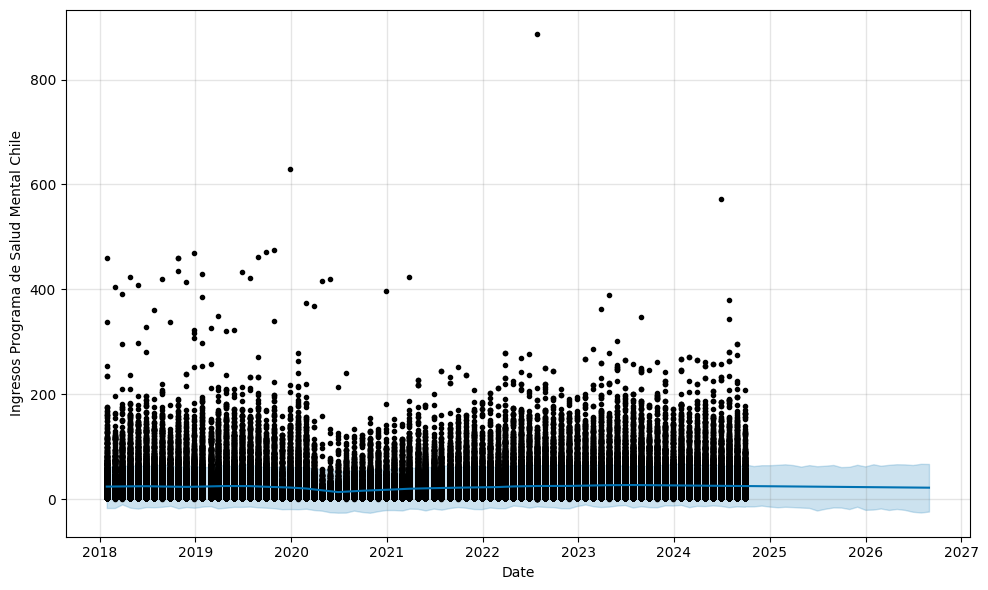

In [12]:
# whole country
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Ingresos Programa de Salud Mental"),
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot = m.plot(forecast, xlabel="Date", ylabel="Ingresos Programa de Salud Mental Chile")

22:37:01 - cmdstanpy - INFO - Chain [1] start processing
22:37:01 - cmdstanpy - INFO - Chain [1] done processing


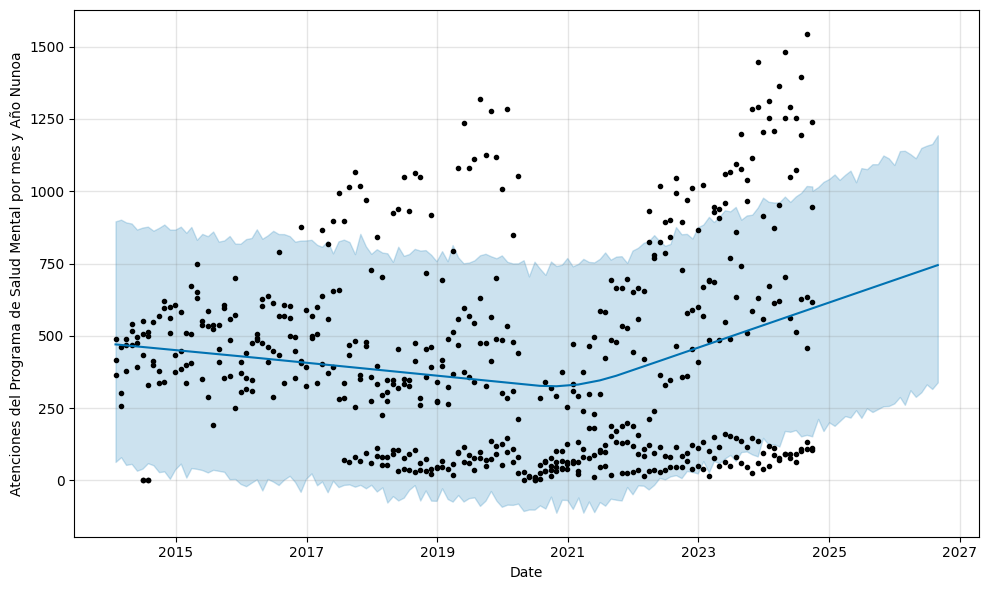

In [13]:
# get data to crunch
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Atenciones del Programa de Salud Mental por mes y Año"),
    pl.col("comuna_nombre").str.contains("NUNOA")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
plot = m.plot(forecast, xlabel="Date", ylabel="Atenciones del Programa de Salud Mental por mes y Año Nunoa")

22:37:01 - cmdstanpy - INFO - Chain [1] start processing
22:37:01 - cmdstanpy - INFO - Chain [1] done processing


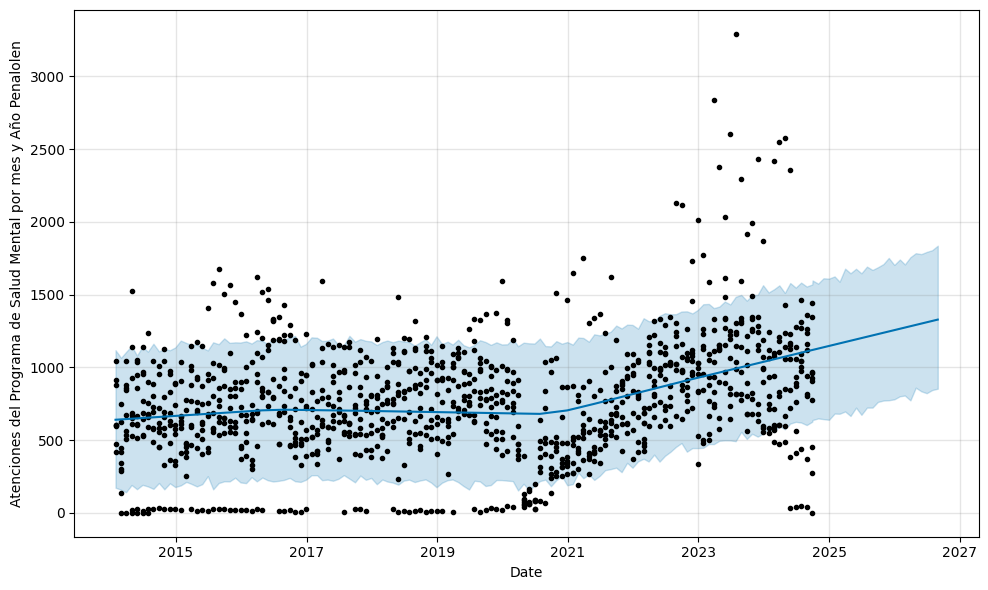

In [14]:
# get data to crunch
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Atenciones del Programa de Salud Mental por mes y Año"),
    pl.col("comuna_nombre").str.contains("PENALOLEN")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
plot = m.plot(forecast, xlabel="Date", ylabel="Atenciones del Programa de Salud Mental por mes y Año Penalolen")

22:37:01 - cmdstanpy - INFO - Chain [1] start processing
22:37:01 - cmdstanpy - INFO - Chain [1] done processing


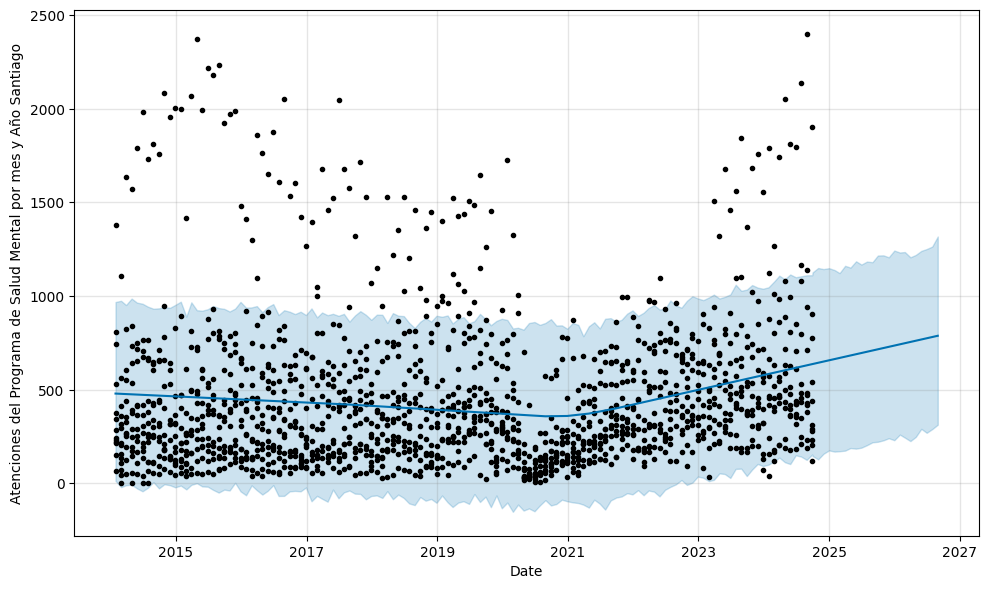

In [15]:
# get data to crunch
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Atenciones del Programa de Salud Mental por mes y Año"),
    pl.col("comuna_nombre").str.contains("SANTIAGO")
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
plot = m.plot(forecast, xlabel="Date", ylabel="Atenciones del Programa de Salud Mental por mes y Año Santiago")

22:37:02 - cmdstanpy - INFO - Chain [1] start processing
22:37:12 - cmdstanpy - INFO - Chain [1] done processing


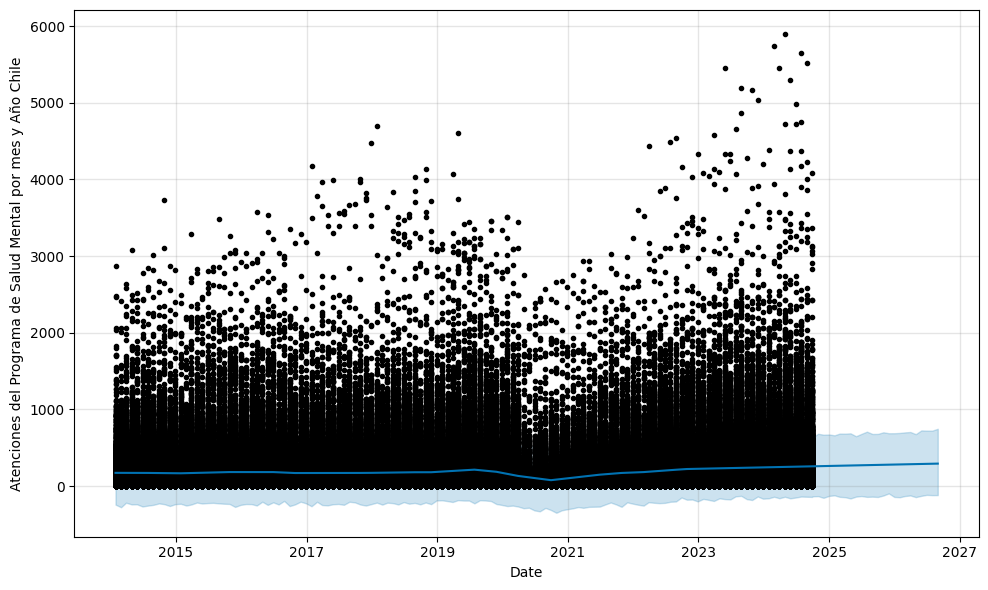

In [16]:
# get data to crunch
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Atenciones del Programa de Salud Mental por mes y Año"),
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()

m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
plot = m.plot(forecast, xlabel="Date", ylabel="Atenciones del Programa de Salud Mental por mes y Año Chile")

22:37:13 - cmdstanpy - INFO - Chain [1] start processing
22:37:14 - cmdstanpy - INFO - Chain [1] done processing


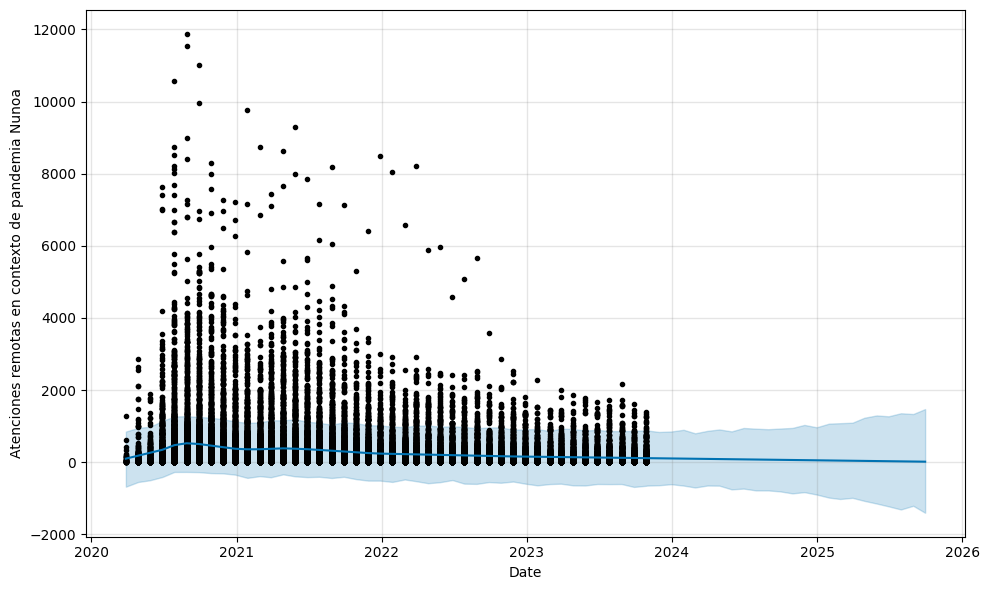

In [17]:
A = data_month.filter(
    pl.col("reporte_descripcion").str.contains("Atenciones Remotas Salud Mental por mes y año"),
).sort("date").select(
    y = pl.col("valor"),
    ds = pl.col("date")
).to_pandas()
m = prophet.Prophet(yearly_seasonality=False)
m.fit(A)
future = m.make_future_dataframe(periods=24, freq="ME")
forecast = m.predict(future)
plot = m.plot(forecast, xlabel="Date", ylabel="Atenciones remotas en contexto de pandemia Nunoa")

